In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader,sampler,Dataset
import torchvision.datasets as dset
import torchvision.transforms as T
import timeit
from PIL import Image
import os
import numpy as np
import scipy.io
#plotting and visualization library
import matplotlib.pyplot as plt
#Display on the notebook
%matplotlib inline
plt.ion() #Turn interactive mode on.
import torch.nn.functional as F

In [ ]:
!mkdir lab5_data
!gdown -O lab5_data.zip "https://drive.google.com/u/0/uc?id=1TfIZpYW0Fbcg-ldTS9N7hs4cF2nnIOK9"
!unzip lab5_data.zip -d lab5_data/

Downloading...
From: https://drive.google.com/u/0/uc?id=1TfIZpYW0Fbcg-ldTS9N7hs4cF2nnIOK9
To: /content/lab5_data.zip
100% 106M/106M [00:01<00:00, 100MB/s] 
Archive:  lab5_data.zip
   creating: lab5_data/catch/
  inflating: lab5_data/catch/96-_Torwarttraining_1_catch_f_cm_np1_le_bad_0.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_0.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_1.avi  
  inflating: lab5_data/catch/Ballfangen_catch_u_cm_np1_fr_goo_2.avi  
  inflating: lab5_data/catch/Ball_hochwerfen_-_Rolle_-_Ball_fangen_(Timo_3)_catch_f_cm_np1_le_goo_0.avi  
  inflating: lab5_data/catch/Ball_hochwerfen_-_Rolle_-_Ball_fangen_(Timo_3)_catch_f_cm_np1_ri_med_1.avi  
  inflating: lab5_data/catch/Behinderten_Sport_part_2_catch_f_cm_np1_fr_bad_0.avi  
  inflating: lab5_data/catch/Behinderten_Sport_part_2_catch_f_cm_np1_ri_bad_1.avi  
  inflating: lab5_data/catch/Faith_Rewarded_catch_f_cm_np1_fr_med_10.avi  
  inflating: lab5_data/catch/Fangen_und_Werf

In [ ]:
import os

path2data = "./"
sub_folder = "lab5_data"
sub_folder_jpg = "lab5_data_jpg"
path2aCatgs = os.path.join(path2data, sub_folder)

listOfCategories = os.listdir(path2aCatgs)
listOfCategories, len(listOfCategories)

(['hit', 'draw_sword', 'smile', 'catch', 'kick'], 5)

In [ ]:
for cat in listOfCategories:
    print("category:", cat)
    path2acat = os.path.join(path2aCatgs, cat)
    listOfSubs = os.listdir(path2acat)
    print("number of sub-folders:", len(listOfSubs))
    print("-"*50)

category: hit
number of sub-folders: 127
--------------------------------------------------
category: draw_sword
number of sub-folders: 103
--------------------------------------------------
category: smile
number of sub-folders: 102
--------------------------------------------------
category: catch
number of sub-folders: 102
--------------------------------------------------
category: kick
number of sub-folders: 130
--------------------------------------------------


In [ ]:
import cv2
import numpy as np
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    # Get number of frames
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # creates sequences of evenly spaced values within a defined interval
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

In [ ]:
extension = ".avi"
n_frames = 16
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg/hit/Drum_Beats_-_Drum_Beats-_Slow_Blues_hit_u_cm_np1_le_bad_0
./lab5_data_jpg/hit/xbox_360_massive_destruction_hit_f_cm_np1_ri_bad_0
./lab5_data_jpg/hit/Atlantis-__Hit_Me_With_Your_Rhythm_Stick__hit_u_cm_np1_ba_bad_1
./lab5_data_jpg/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_f_cm_np1_le_bad_0
./lab5_data_jpg/hit/RomeEpisode1_hit_u_nm_np1_fr_bad_2
./lab5_data_jpg/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_nm_np1_le_bad_1
./lab5_data_jpg/hit/Opel_vs_Vorschlaghammer_hit_u_cm_np1_ba_bad_4
./lab5_data_jpg/hit/AmericanGangster_hit_u_nm_np1_le_med_64
./lab5_data_jpg/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg/hit/HARD_FACE_SLAP_COMPILATION_-_THE_FUNNIEST_FACE_SLAPS_EVER!!_-_Old_school_Vids_hit_u_cm_np1_ba_bad_1
./lab5_data_jpg/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg/hit/Failure_of_Printers_(printer_destruction_video)_hit_f_cm_np1_ri_bad_1
./lab5_data_jpg/hit/Vorschlagha

In [ ]:
from torchvision.transforms.functional import to_pil_image

In [ ]:
def get_vids(path2ajpgs):
    listOfCats = os.listdir(path2ajpgs)
    ids = []
    labels = []
    for catg in listOfCats:
        path2catg = os.path.join(path2ajpgs, catg)
        listOfSubCats = os.listdir(path2catg)
        path2subCats= [os.path.join(path2catg,los) for los in listOfSubCats]
        ids.extend(path2subCats)
        labels.extend([catg]*len(listOfSubCats))
    return ids, labels, listOfCats

In [ ]:
path2ajpgs= "lab5_data_jpg/"
all_vids, all_labels, catgs = get_vids(path2ajpgs)
len(all_vids), len(all_labels), len(catgs)

(564, 564, 5)

In [ ]:
all_vids[:1], all_labels[:3], catgs

(['lab5_data_jpg/hit/THE_PROTECTOR_hit_u_cm_np1_ri_bad_97'],
 ['hit', 'hit', 'hit'],
 ['hit', 'draw_sword', 'smile', 'catch', 'kick'])

In [ ]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict

{'hit': 0, 'draw_sword': 1, 'smile': 2, 'catch': 3, 'kick': 4}

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
unique_ids[0],set(unique_labels)

('lab5_data_jpg/hit/THE_PROTECTOR_hit_u_cm_np1_ri_bad_97',
 {'catch', 'draw_sword', 'hit', 'kick', 'smile'})

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg/catch/Torwartraining_TuS_Koblenz_11_08_09_catch_f_cm_np1_le_bad_1',
  'lab5_data_jpg/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ri_bad_18',
  'lab5_data_jpg/draw_sword/Iaido_13_katas_draw_sword_f_nm_np1_fr_med_7',
  'lab5_data_jpg/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_bad_2',
  'lab5_data_jpg/hit/Baseball_Bat_V_S__Computer_Monitor_hit_f_cm_np1_ri_bad_2'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_cm_np1_le_bad_0',
  'lab5_data_jpg/kick/kick__Best_fight_scene_of_all_time_kick_f_cm_np1_ri_bad_1',
  'lab5_data_jpg/hit/T_r_zerhacken_hit_f_cm_np1_le_bad_0',
  'lab5_data_jpg/hit/TV_Recycling_hit_f_cm_np1_le_bad_2',
  'lab5_data_jpg/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_goo_2'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 112, 112]), 4, tensor(-1.8952), tensor(1.0664))

In [ ]:
def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)
    return x

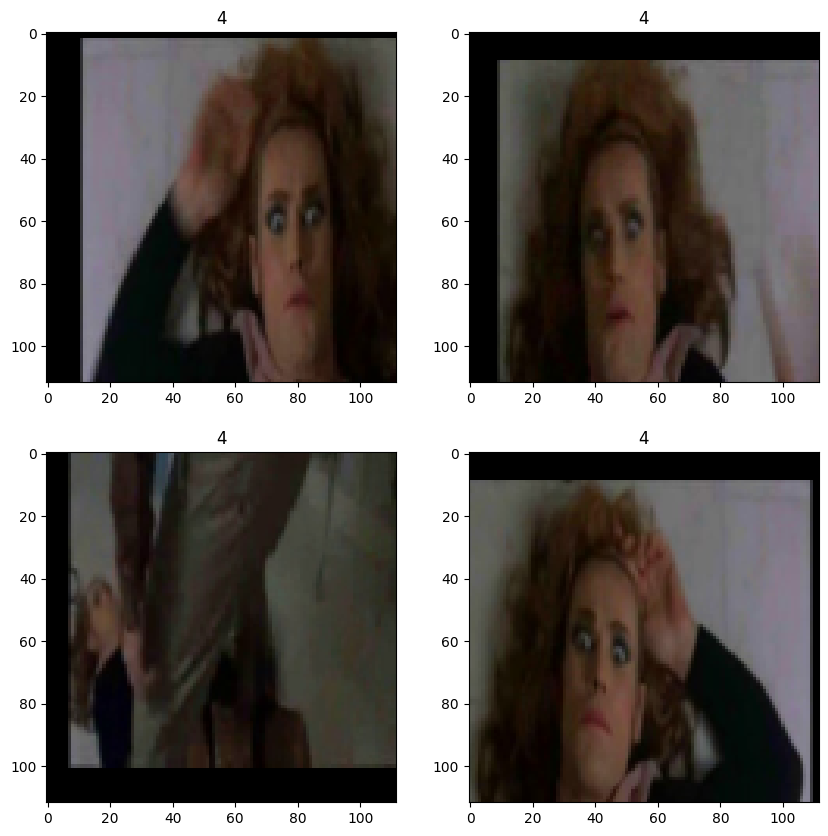

In [ ]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

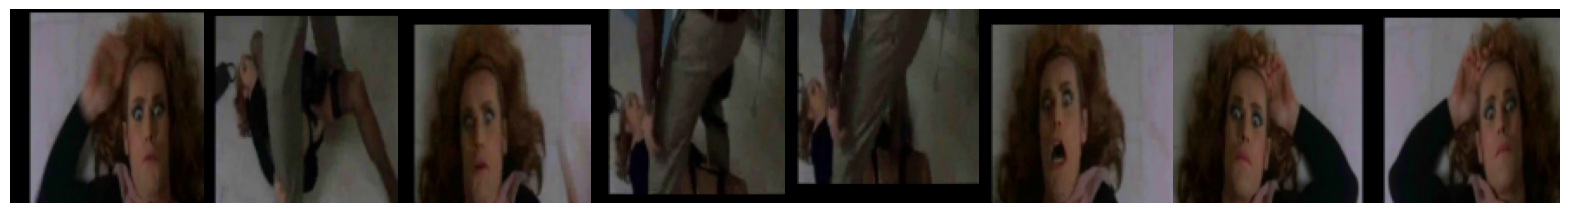

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.axis("off")

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

57


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.6748))

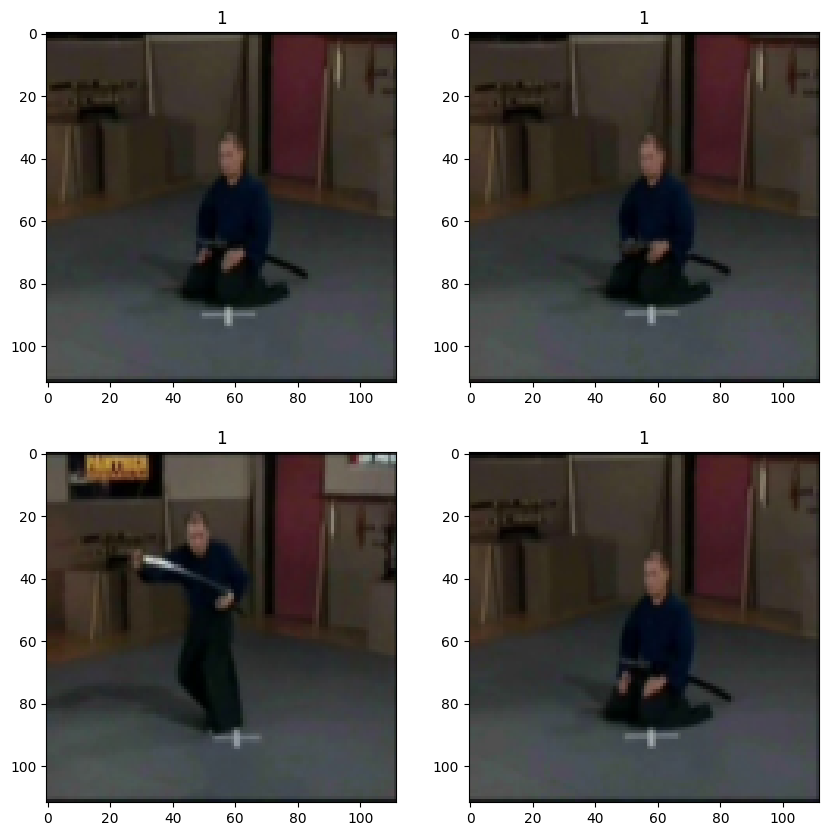

In [ ]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(denormalize(img, mean, std))
    plt.title(label)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class NetRnn(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(NetRnn, self).__init__()


        conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 2)

        pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        conv2 =  nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2)

        pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=64*6*6, hidden_size=128, num_layers=1,batch_first=True)

        #fully connected layer
        self.fc1 = nn.Linear(128, 5)


    #defining the structure of the network
    def forward(self, x):
        # 8, 16, 3, 112, 112
        b_z, ts, c, h, w = x.shape
        # Conv2d can only work on dim 4 input
        y = self.feat_extractor(x.view(b_z*ts,c,h,w))
        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out






fixed_model_rnn = NetRnn().cuda()

#Printing the network architecture
print(fixed_model_rnn)


NetRnn(
  (feat_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(2304, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_rnn.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def train(model, loss_fn, optimizer,dataloader,num_epochs = 1):
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))

        model.train()
        for t, sample in enumerate(dataloader):
            x_var = sample[0].cuda()
            y_var = sample[1].long().cuda()

            scores = model(x_var)

            loss = loss_fn(scores, y_var)
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f' % (t + 1, loss.data.item()))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        scheduler.step()
        check_accuracy(model, clip_dataloader_test)

def check_accuracy(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    with torch.no_grad():
      for t, sample in enumerate(loader):
          x_var = sample[0].cuda()
          y_var = sample[1]
          y_var=y_var.cpu()
          scores = model(x_var)
          _, preds = scores.data.cpu().max(1)

          num_correct += (preds.numpy() == y_var.numpy()).sum()
          num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

In [ ]:
fixed_model_rnn.train()
print_every = 20
train(fixed_model_rnn, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_rnn.eval()
check_accuracy(fixed_model_rnn, clip_dataloader_train)
check_accuracy(fixed_model_rnn, clip_dataloader_test)

Starting epoch 1 / 10
t = 20, loss = 1.5687
t = 40, loss = 1.5195
t = 60, loss = 1.4379
Got 20 / 57 correct (35.09)
Starting epoch 2 / 10
t = 20, loss = 1.1797
t = 40, loss = 1.4354
t = 60, loss = 1.6281
Got 29 / 57 correct (50.88)
Starting epoch 3 / 10
t = 20, loss = 1.3788
t = 40, loss = 1.4099
t = 60, loss = 1.1454
Got 21 / 57 correct (36.84)
Starting epoch 4 / 10
t = 20, loss = 1.2836
t = 40, loss = 1.2295
t = 60, loss = 1.3013
Got 25 / 57 correct (43.86)
Starting epoch 5 / 10
t = 20, loss = 1.2265
t = 40, loss = 0.9566
t = 60, loss = 1.2506
Got 28 / 57 correct (49.12)
Starting epoch 6 / 10
t = 20, loss = 0.9552
t = 40, loss = 0.9453
t = 60, loss = 0.5794
Got 30 / 57 correct (52.63)
Starting epoch 7 / 10
t = 20, loss = 0.7006
t = 40, loss = 1.2989
t = 60, loss = 1.1203
Got 26 / 57 correct (45.61)
Starting epoch 8 / 10
t = 20, loss = 1.2429
t = 40, loss = 0.7047
t = 60, loss = 1.2205
Got 29 / 57 correct (50.88)
Starting epoch 9 / 10
t = 20, loss = 0.8766
t = 40, loss = 0.9543
t = 60

# Exercise
- Repeat experiments with number of frames as 8 and 20
- Repeat experiments with number of LSTM layers as 2 and 4
- Click a clip of you smiling, upload the clip, take 20 frames, and test the clip with the above model

## Number of Frames = 8

In [ ]:
sub_folder_jpg_8 = "lab5_data_jpg_8"
sub_folder_jpg_20 = "lab5_data_jpg_20"

In [ ]:
n_frames = 8
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg_8)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg_8/hit/Drum_Beats_-_Drum_Beats-_Slow_Blues_hit_u_cm_np1_le_bad_0
./lab5_data_jpg_8/hit/xbox_360_massive_destruction_hit_f_cm_np1_ri_bad_0
./lab5_data_jpg_8/hit/Atlantis-__Hit_Me_With_Your_Rhythm_Stick__hit_u_cm_np1_ba_bad_1
./lab5_data_jpg_8/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_f_cm_np1_le_bad_0
./lab5_data_jpg_8/hit/RomeEpisode1_hit_u_nm_np1_fr_bad_2
./lab5_data_jpg_8/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_nm_np1_le_bad_1
./lab5_data_jpg_8/hit/Opel_vs_Vorschlaghammer_hit_u_cm_np1_ba_bad_4
./lab5_data_jpg_8/hit/AmericanGangster_hit_u_nm_np1_le_med_64
./lab5_data_jpg_8/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg_8/hit/HARD_FACE_SLAP_COMPILATION_-_THE_FUNNIEST_FACE_SLAPS_EVER!!_-_Old_school_Vids_hit_u_cm_np1_ba_bad_1
./lab5_data_jpg_8/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg_8/hit/Failure_of_Printers_(printer_destruction_video)_hit_f_cm_np1_ri_bad_1
./lab5_

In [ ]:
path2ajpgs= "lab5_data_jpg_8/"
all_vids_8, all_labels_8, catgs_8 = get_vids(path2ajpgs)
len(all_vids_8), len(all_labels_8), len(catgs_8)

(564, 564, 5)

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids_8,all_labels_8) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids_8,all_labels_8) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg_8/catch/Torwartraining_TuS_Koblenz_11_08_09_catch_f_cm_np1_le_bad_1',
  'lab5_data_jpg_8/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ri_bad_18',
  'lab5_data_jpg_8/draw_sword/Iaido_13_katas_draw_sword_f_nm_np1_fr_med_7',
  'lab5_data_jpg_8/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_bad_2',
  'lab5_data_jpg_8/hit/Baseball_Bat_V_S__Computer_Monitor_hit_f_cm_np1_ri_bad_2'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg_8/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_cm_np1_le_bad_0',
  'lab5_data_jpg_8/kick/kick__Best_fight_scene_of_all_time_kick_f_cm_np1_ri_bad_1',
  'lab5_data_jpg_8/hit/T_r_zerhacken_hit_f_cm_np1_le_bad_0',
  'lab5_data_jpg_8/hit/TV_Recycling_hit_f_cm_np1_le_bad_2',
  'lab5_data_jpg_8/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_goo_2'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 4, tensor(-1.8952), tensor(1.0122))

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

57


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.6568))

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class NetRnn(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(NetRnn, self).__init__()


        conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 2)

        pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        conv2 =  nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2)

        pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=64*6*6, hidden_size=128, num_layers=1,batch_first=True)

        #fully connected layer
        self.fc1 = nn.Linear(128, 5)


    #defining the structure of the network
    def forward(self, x):
        # 8, 16, 3, 112, 112
        b_z, ts, c, h, w = x.shape
        # Conv2d can only work on dim 4 input
        y = self.feat_extractor(x.view(b_z*ts,c,h,w))
        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out






fixed_model_rnn = NetRnn().cuda()

#Printing the network architecture
print(fixed_model_rnn)


NetRnn(
  (feat_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(2304, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_rnn.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
fixed_model_rnn.train()
print_every = 20
train(fixed_model_rnn, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_rnn.eval()
check_accuracy(fixed_model_rnn, clip_dataloader_train)
check_accuracy(fixed_model_rnn, clip_dataloader_test)

Starting epoch 1 / 10
t = 20, loss = 1.5264
t = 40, loss = 1.6420
t = 60, loss = 1.4271
Got 18 / 57 correct (31.58)
Starting epoch 2 / 10
t = 20, loss = 1.4001
t = 40, loss = 1.4192
t = 60, loss = 1.4038
Got 21 / 57 correct (36.84)
Starting epoch 3 / 10
t = 20, loss = 1.6124
t = 40, loss = 1.3378
t = 60, loss = 0.9902
Got 24 / 57 correct (42.11)
Starting epoch 4 / 10
t = 20, loss = 1.0811
t = 40, loss = 0.8722
t = 60, loss = 1.3140
Got 23 / 57 correct (40.35)
Starting epoch 5 / 10
t = 20, loss = 1.5996
t = 40, loss = 0.7448
t = 60, loss = 1.2986
Got 26 / 57 correct (45.61)
Starting epoch 6 / 10
t = 20, loss = 0.9243
t = 40, loss = 1.1267
t = 60, loss = 0.9555
Got 29 / 57 correct (50.88)
Starting epoch 7 / 10
t = 20, loss = 0.9517
t = 40, loss = 1.2940
t = 60, loss = 1.0015
Got 30 / 57 correct (52.63)
Starting epoch 8 / 10
t = 20, loss = 1.2319
t = 40, loss = 0.9898
t = 60, loss = 0.8631
Got 31 / 57 correct (54.39)
Starting epoch 9 / 10
t = 20, loss = 1.2237
t = 40, loss = 0.8406
t = 60

## Number of Frames = 20

In [ ]:
n_frames = 20
for root, dirs, files in os.walk(path2aCatgs, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2vid = os.path.join(root, name)
        frames, vlen = get_frames(path2vid, n_frames= n_frames)
        path2store = path2vid.replace(sub_folder, sub_folder_jpg_20)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./lab5_data_jpg_20/hit/Drum_Beats_-_Drum_Beats-_Slow_Blues_hit_u_cm_np1_le_bad_0
./lab5_data_jpg_20/hit/xbox_360_massive_destruction_hit_f_cm_np1_ri_bad_0
./lab5_data_jpg_20/hit/Atlantis-__Hit_Me_With_Your_Rhythm_Stick__hit_u_cm_np1_ba_bad_1
./lab5_data_jpg_20/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_f_cm_np1_le_bad_0
./lab5_data_jpg_20/hit/RomeEpisode1_hit_u_nm_np1_fr_bad_2
./lab5_data_jpg_20/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_nm_np1_le_bad_1
./lab5_data_jpg_20/hit/Opel_vs_Vorschlaghammer_hit_u_cm_np1_ba_bad_4
./lab5_data_jpg_20/hit/AmericanGangster_hit_u_nm_np1_le_med_64
./lab5_data_jpg_20/hit/Einde_van_Opel_Kadett_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg_20/hit/HARD_FACE_SLAP_COMPILATION_-_THE_FUNNIEST_FACE_SLAPS_EVER!!_-_Old_school_Vids_hit_u_cm_np1_ba_bad_1
./lab5_data_jpg_20/hit/Collins_getting_hit_with_a_stick_on_the_head_hit_u_cm_np1_fr_bad_1
./lab5_data_jpg_20/hit/Failure_of_Printers_(printer_destruction_video)_hit_f_cm_np1_ri_b

In [ ]:
path2ajpgs= "lab5_data_jpg_8/"
all_vids_20, all_labels_20, catgs_20 = get_vids(path2ajpgs)
len(all_vids_20), len(all_labels_20), len(catgs_20)

(564, 564, 5)

In [ ]:
num_classes =5
unique_ids = [id_ for id_, label in zip(all_vids_20,all_labels_20) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids_20,all_labels_20) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(564, 564)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#Provides train/test indices to split data in train/test sets.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels))

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

507 507
57 57


In [ ]:
train_ids[:5], train_labels[:5]

(['lab5_data_jpg_8/catch/Torwartraining_TuS_Koblenz_11_08_09_catch_f_cm_np1_le_bad_1',
  'lab5_data_jpg_8/kick/kick__bruce_lee_v_s_japanese_kick_f_cm_np1_ri_bad_18',
  'lab5_data_jpg_8/draw_sword/Iaido_13_katas_draw_sword_f_nm_np1_fr_med_7',
  'lab5_data_jpg_8/catch/Seldin_Lipovic_-_Willi_Weber__Torwarttraining__catch_f_cm_np1_le_bad_2',
  'lab5_data_jpg_8/hit/Baseball_Bat_V_S__Computer_Monitor_hit_f_cm_np1_ri_bad_2'],
 ['catch', 'kick', 'draw_sword', 'catch', 'hit'])

In [ ]:
test_ids[:5], test_labels[:5]

(['lab5_data_jpg_8/hit/Blues_Shuffle_Drum_Beats_-_Blues_Drum_Beats-_Crash_on__Four_And__hit_u_cm_np1_le_bad_0',
  'lab5_data_jpg_8/kick/kick__Best_fight_scene_of_all_time_kick_f_cm_np1_ri_bad_1',
  'lab5_data_jpg_8/hit/T_r_zerhacken_hit_f_cm_np1_le_bad_0',
  'lab5_data_jpg_8/hit/TV_Recycling_hit_f_cm_np1_le_bad_2',
  'lab5_data_jpg_8/smile/SMILES_FROM_OFF_THE_ROAD_2_-TREASURING_THE_GIRLCHILD_smile_h_nm_np1_fr_goo_2'],
 ['hit', 'kick', 'hit', 'hit', 'smile'])

In [ ]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import random

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)


        frames_tr = []
        for frame in frames:
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [ ]:
import torchvision.transforms as transforms
h, w = 112, 112
mean = [0.43216, 0.394666, 0.37645]
std = [0.22803, 0.22145, 0.216989]
train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])

In [ ]:
timesteps = n_frames
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

507


In [ ]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 4, tensor(-1.8952), tensor(1.1206))

In [ ]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

57


In [ ]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([8, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.6568))

In [ ]:
clip_dataloader_train = DataLoader(train_ds, batch_size=8,
                        shuffle=True, num_workers=4)
clip_dataloader_test = DataLoader(test_ds, batch_size=8,
                        shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
class NetRnn(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(NetRnn, self).__init__()


        conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 2)

        pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        conv2 =  nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2)

        pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=64*6*6, hidden_size=128, num_layers=1,batch_first=True)

        #fully connected layer
        self.fc1 = nn.Linear(128, 5)


    #defining the structure of the network
    def forward(self, x):
        # 8, 16, 3, 112, 112
        b_z, ts, c, h, w = x.shape
        # Conv2d can only work on dim 4 input
        y = self.feat_extractor(x.view(b_z*ts,c,h,w))
        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out






fixed_model_rnn = NetRnn().cuda()

#Printing the network architecture
print(fixed_model_rnn)


NetRnn(
  (feat_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(2304, 128, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(fixed_model_rnn.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
fixed_model_rnn.train()
print_every = 20
train(fixed_model_rnn, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
fixed_model_rnn.eval()
check_accuracy(fixed_model_rnn, clip_dataloader_train)
check_accuracy(fixed_model_rnn, clip_dataloader_test)

Starting epoch 1 / 10
t = 20, loss = 1.5401
t = 40, loss = 1.6674
t = 60, loss = 1.6537
Got 23 / 57 correct (40.35)
Starting epoch 2 / 10
t = 20, loss = 1.3268
t = 40, loss = 1.5643
t = 60, loss = 1.3238
Got 24 / 57 correct (42.11)
Starting epoch 3 / 10
t = 20, loss = 1.4286
t = 40, loss = 1.0696
t = 60, loss = 1.5451
Got 24 / 57 correct (42.11)
Starting epoch 4 / 10
t = 20, loss = 1.0591
t = 40, loss = 0.8497
t = 60, loss = 1.2458
Got 27 / 57 correct (47.37)
Starting epoch 5 / 10
t = 20, loss = 0.9365
t = 40, loss = 1.7606
t = 60, loss = 1.3883
Got 26 / 57 correct (45.61)
Starting epoch 6 / 10
t = 20, loss = 0.9624
t = 40, loss = 0.9173
t = 60, loss = 1.0672
Got 27 / 57 correct (47.37)
Starting epoch 7 / 10
t = 20, loss = 1.2976
t = 40, loss = 1.2445
t = 60, loss = 0.7499
Got 28 / 57 correct (49.12)
Starting epoch 8 / 10
t = 20, loss = 0.9759
t = 40, loss = 0.7671
t = 60, loss = 0.7647
Got 26 / 57 correct (45.61)
Starting epoch 9 / 10
t = 20, loss = 0.8227
t = 40, loss = 0.7299
t = 60

## Number of LSTM layers = 2

In [ ]:
class NetRnn_2layers(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(NetRnn_2layers, self).__init__()


        conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 2)

        pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        conv2 =  nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2)

        pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=64*6*6, hidden_size=128, num_layers=2,batch_first=True)

        #fully connected layer
        self.fc1 = nn.Linear(128, 5)


    #defining the structure of the network
    def forward(self, x):
        # 8, 16, 3, 112, 112
        b_z, ts, c, h, w = x.shape
        # Conv2d can only work on dim 4 input
        y = self.feat_extractor(x.view(b_z*ts,c,h,w))
        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out






rnn_2_layers = NetRnn_2layers().cuda()

#Printing the network architecture
print(rnn_2_layers)


NetRnn_2layers(
  (feat_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(2304, 128, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(rnn_2_layers.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
rnn_2_layers.train()
print_every = 20
train(rnn_2_layers, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
rnn_2_layers.eval()
check_accuracy(rnn_2_layers, clip_dataloader_train)
check_accuracy(rnn_2_layers, clip_dataloader_test)

Starting epoch 1 / 10
t = 20, loss = 1.5792
t = 40, loss = 1.5808
t = 60, loss = 1.5569
Got 20 / 57 correct (35.09)
Starting epoch 2 / 10
t = 20, loss = 1.5824
t = 40, loss = 1.5752
t = 60, loss = 1.5831
Got 20 / 57 correct (35.09)
Starting epoch 3 / 10
t = 20, loss = 1.5383
t = 40, loss = 1.5711
t = 60, loss = 1.4919
Got 24 / 57 correct (42.11)
Starting epoch 4 / 10
t = 20, loss = 1.4180
t = 40, loss = 1.4003
t = 60, loss = 1.4941
Got 22 / 57 correct (38.60)
Starting epoch 5 / 10
t = 20, loss = 1.4355
t = 40, loss = 1.6351
t = 60, loss = 1.4317
Got 25 / 57 correct (43.86)
Starting epoch 6 / 10
t = 20, loss = 1.2752
t = 40, loss = 1.1434
t = 60, loss = 1.6065
Got 24 / 57 correct (42.11)
Starting epoch 7 / 10
t = 20, loss = 1.4700
t = 40, loss = 1.4272
t = 60, loss = 1.2357
Got 25 / 57 correct (43.86)
Starting epoch 8 / 10
t = 20, loss = 1.5076
t = 40, loss = 1.3302
t = 60, loss = 1.2845
Got 25 / 57 correct (43.86)
Starting epoch 9 / 10
t = 20, loss = 1.6856
t = 40, loss = 1.3636
t = 60

## Number of LSTM layers = 4

In [ ]:
class NetRnn_4layers(nn.Module):

    #define the learnable paramters by calling the respective modules (nn.Conv2d, nn.MaxPool2d etc.)
    def __init__(self):
        super(NetRnn_4layers, self).__init__()


        conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 2)

        pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        conv2 =  nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2)

        pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.feat_extractor=nn.Sequential(conv1,nn.ReLU(),pool1,conv2,nn.ReLU(),pool2)

        self.rnn = nn.LSTM(input_size=64*6*6, hidden_size=128, num_layers=2,batch_first=True)

        #fully connected layer
        self.fc1 = nn.Linear(128, 5)


    #defining the structure of the network
    def forward(self, x):
        # 8, 16, 3, 112, 112
        b_z, ts, c, h, w = x.shape
        # Conv2d can only work on dim 4 input
        y = self.feat_extractor(x.view(b_z*ts,c,h,w))
        # reinstating the batchsize and frames
        y = y.view(b_z,ts,-1)
        #output has a size of 8x16x128 - basically we have the output for each frame of each clip.
        outp, (hn, cn) = self.rnn(y)
        # We only need the RNN/LSTM output of the last frame since it incorporates all the frame knowledge
        out = self.fc1(outp[:,-1,:])
        return out






rnn_4_layers = NetRnn_4layers().cuda()

#Printing the network architecture
print(rnn_4_layers)

NetRnn_4layers(
  (feat_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (rnn): LSTM(2304, 128, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=128, out_features=5, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(rnn_4_layers.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
rnn_4_layers.train()
print_every = 20
train(rnn_4_layers, loss_fn, optimizer,clip_dataloader_train, num_epochs=10)
rnn_4_layers.eval()
check_accuracy(rnn_4_layers, clip_dataloader_train)
check_accuracy(rnn_4_layers, clip_dataloader_test)

Starting epoch 1 / 10
t = 20, loss = 1.6077
t = 40, loss = 1.5807
t = 60, loss = 1.5576
Got 17 / 57 correct (29.82)
Starting epoch 2 / 10
t = 20, loss = 1.6056
t = 40, loss = 1.5173
t = 60, loss = 1.5685
Got 21 / 57 correct (36.84)
Starting epoch 3 / 10
t = 20, loss = 1.4572
t = 40, loss = 1.3966
t = 60, loss = 1.4705
Got 23 / 57 correct (40.35)
Starting epoch 4 / 10
t = 20, loss = 1.5384
t = 40, loss = 1.4158
t = 60, loss = 1.2724
Got 23 / 57 correct (40.35)
Starting epoch 5 / 10
t = 20, loss = 1.2993
t = 40, loss = 1.3584
t = 60, loss = 1.4109
Got 22 / 57 correct (38.60)
Starting epoch 6 / 10
t = 20, loss = 1.4023
t = 40, loss = 1.3791
t = 60, loss = 1.6645
Got 23 / 57 correct (40.35)
Starting epoch 7 / 10
t = 20, loss = 1.5354
t = 40, loss = 1.5315
t = 60, loss = 1.6303
Got 23 / 57 correct (40.35)
Starting epoch 8 / 10
t = 20, loss = 1.3291
t = 40, loss = 1.3081
t = 60, loss = 1.3245
Got 23 / 57 correct (40.35)
Starting epoch 9 / 10
t = 20, loss = 1.4013
t = 40, loss = 1.3210
t = 60

## Smiling Clip Prediction

In [ ]:
frames, vlen = get_frames('/content/smile_vid.mp4', n_frames= 20)

In [ ]:
len(frames)

21

In [ ]:
vlen

182

In [ ]:
test_transformer2 = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])
# test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)

In [ ]:
frames_tr = []
for frame in frames:
    # frame= torch.from_numpy(frame)
    frame = test_transformer2(torch.Tensor(frame).transpose(0,2))
    frames_tr.append(frame)
if len(frames_tr)>0:
    frames_tr = torch.stack(frames_tr)

In [ ]:
frames_tr.shape

torch.Size([21, 3, 112, 112])

In [ ]:
fr=frames_tr.transpose(1,3)

In [ ]:
fixed_model_rnn(frames_tr[:-1].view(1,20,3,112,112).cuda())

tensor([[-0.3917,  0.4614,  0.4373,  0.2251, -1.1234]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
{'catch': 0, 'kick': 1, 'smile': 2, 'draw_sword': 3, 'hit': 4}

{'catch': 0, 'kick': 1, 'smile': 2, 'draw_sword': 3, 'hit': 4}